
Dimensions of the dataframe: (4888, 20)

Data types of each column:
 CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

Missing values in each column:
 CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
Dur

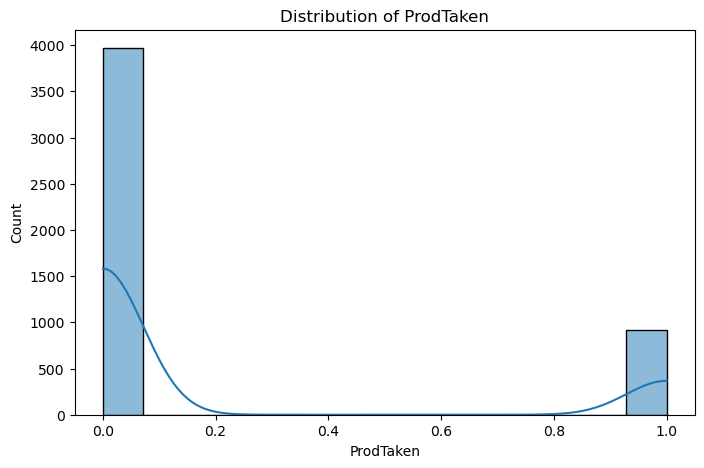

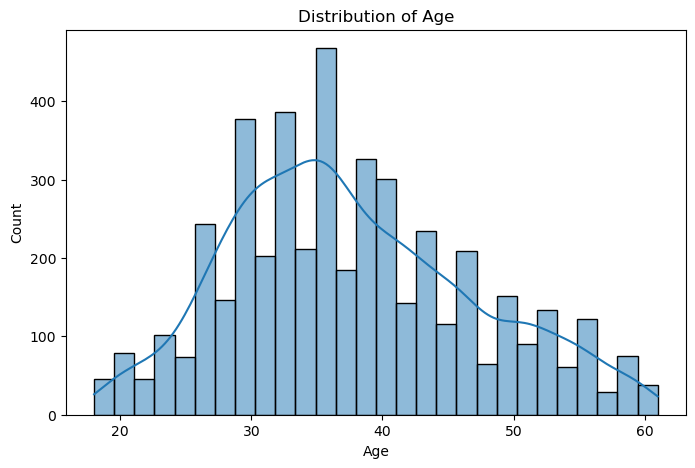

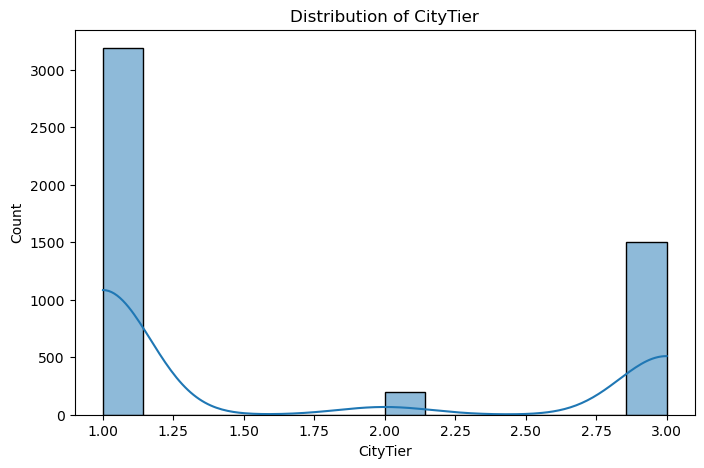

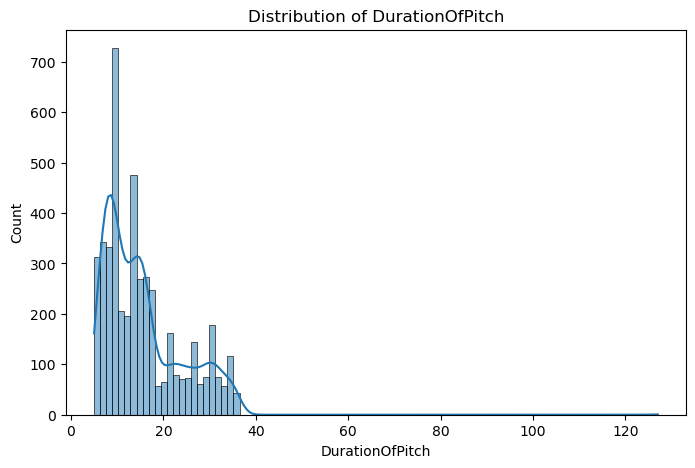

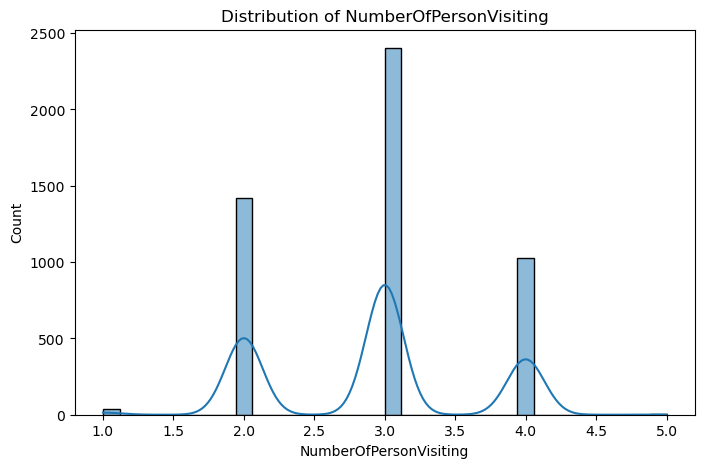

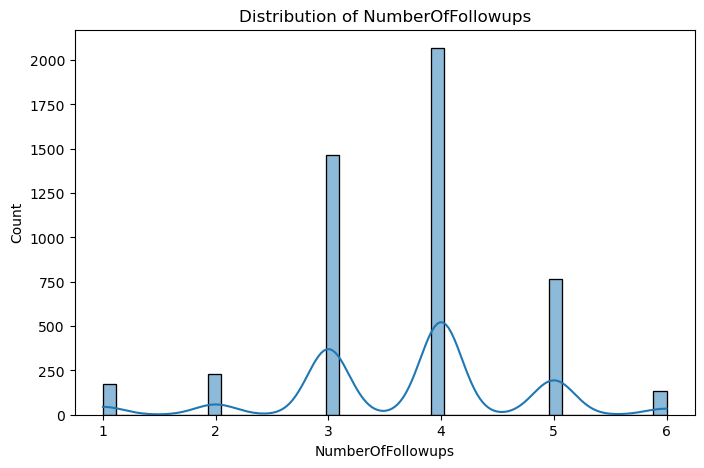

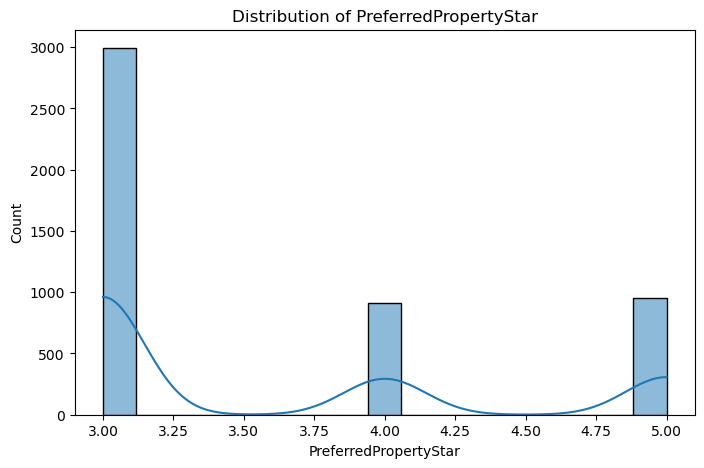

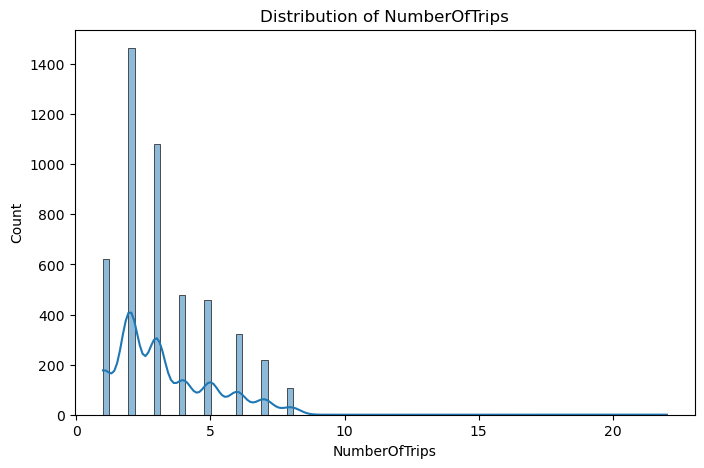

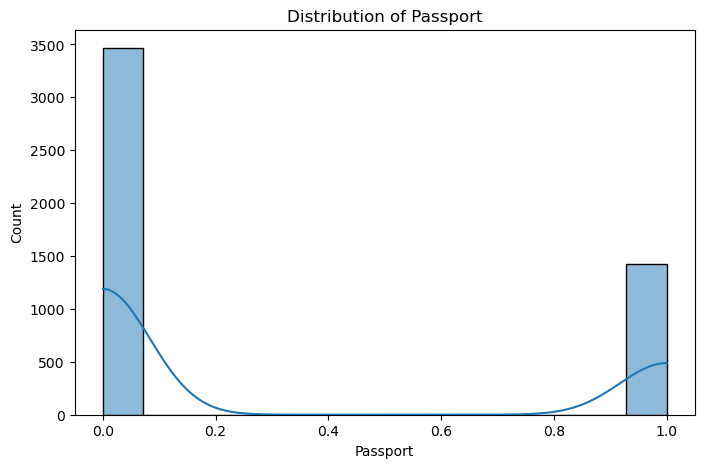

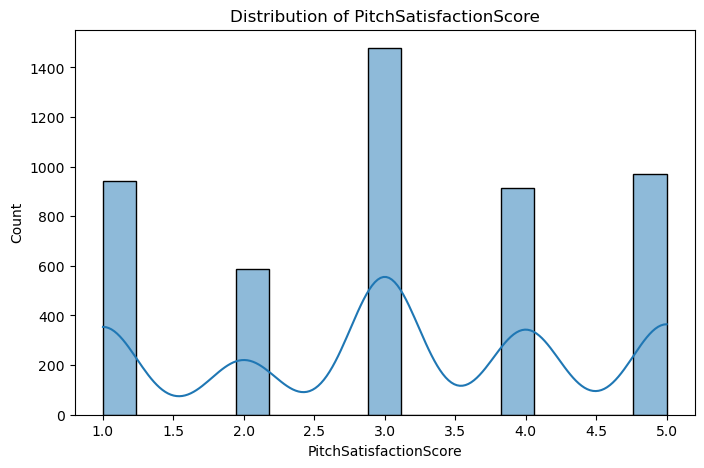

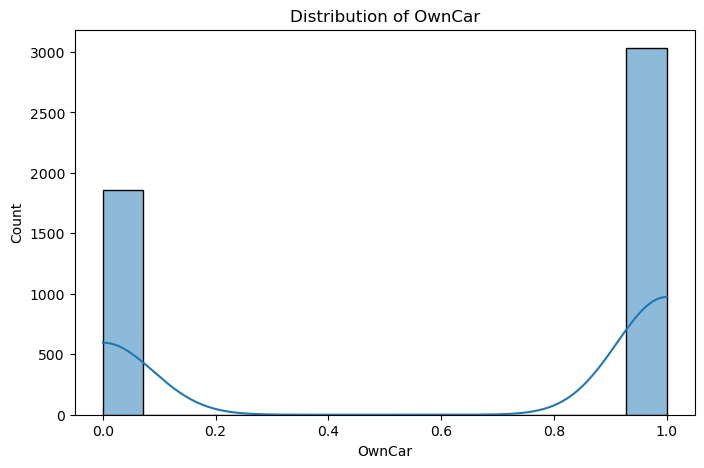

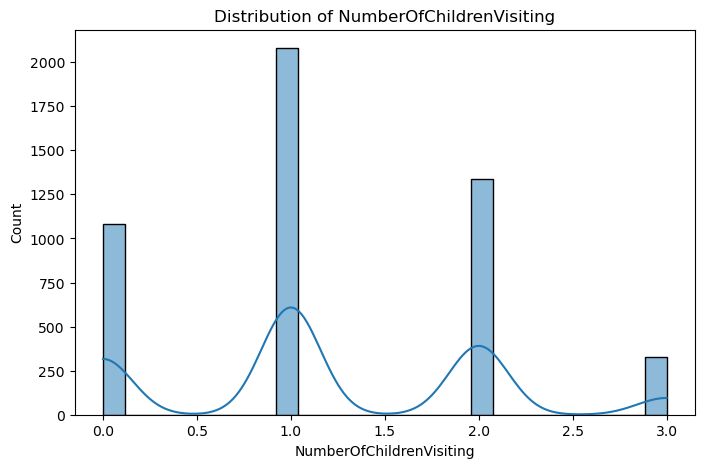

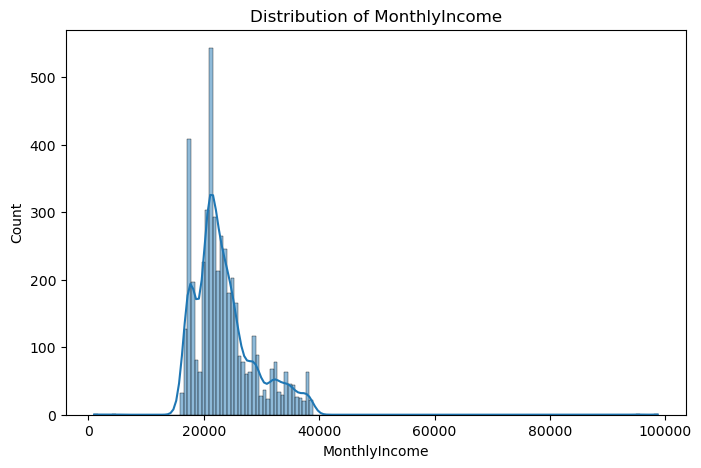

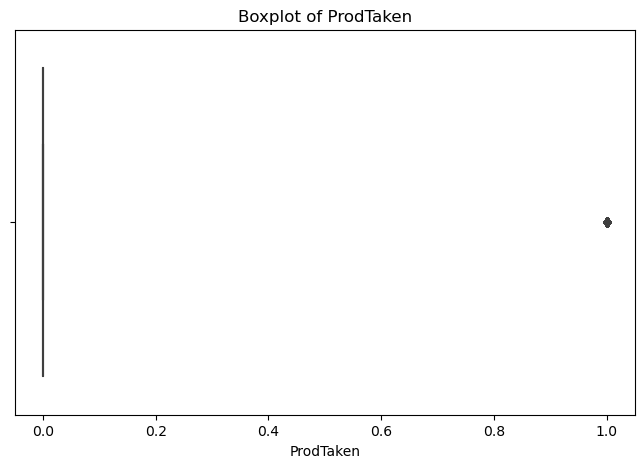

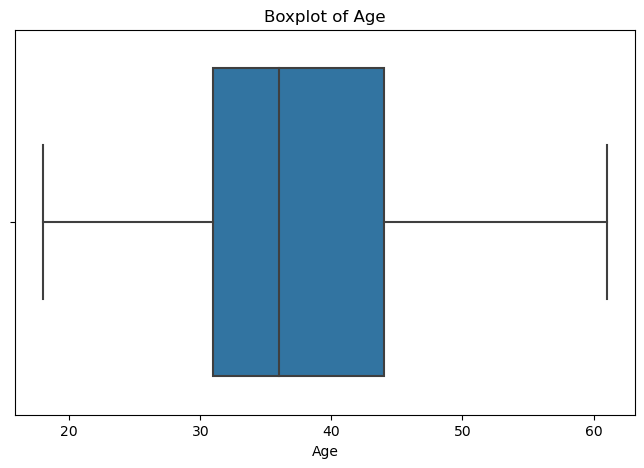

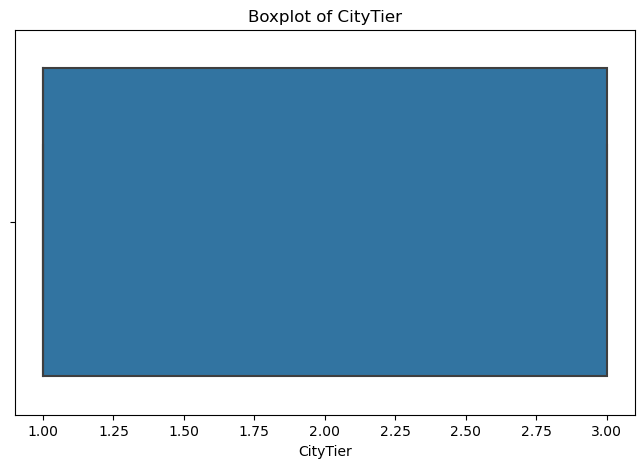

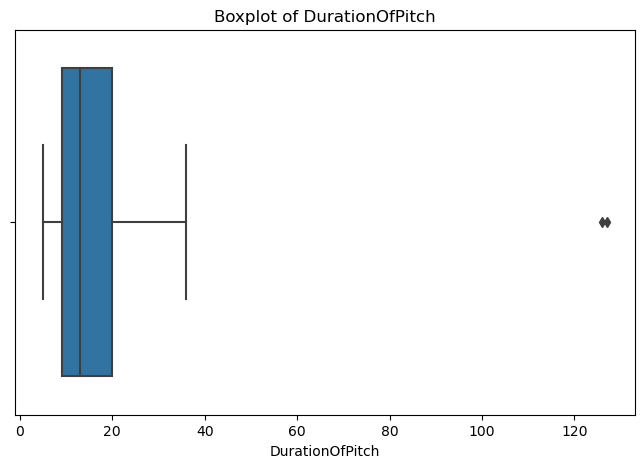

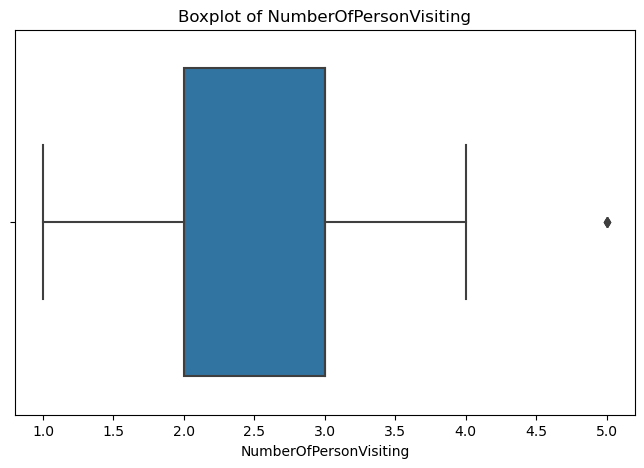

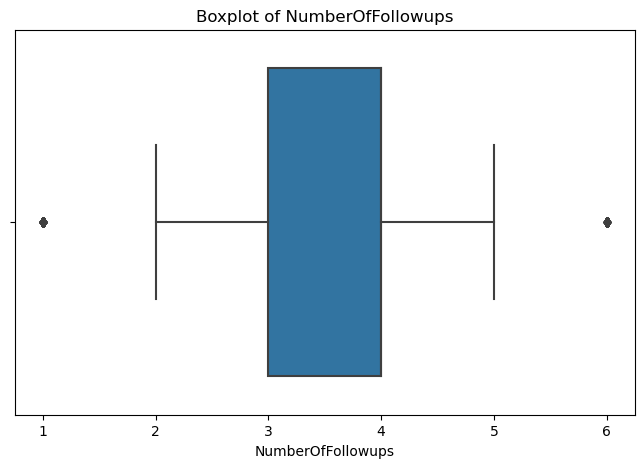

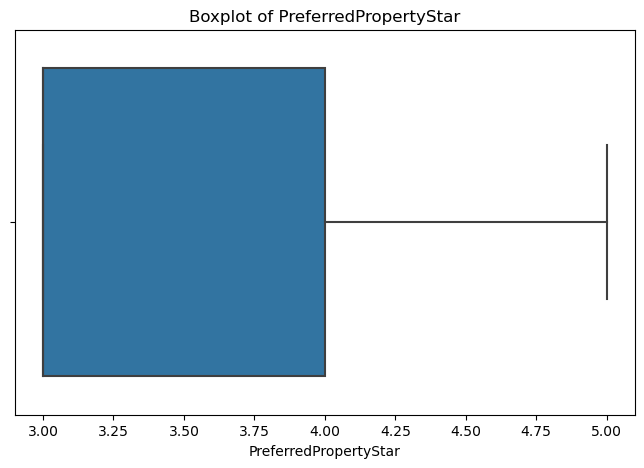

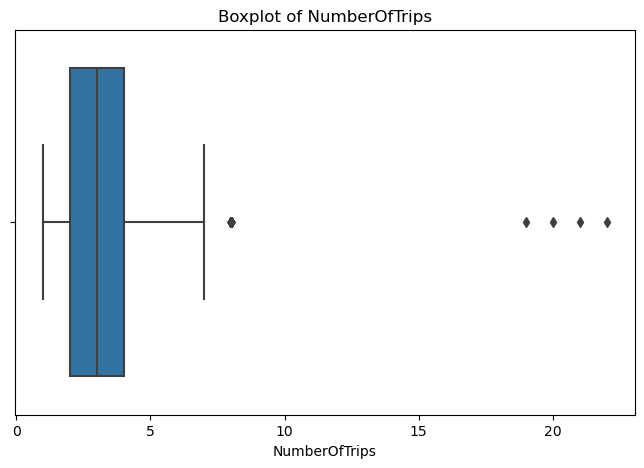

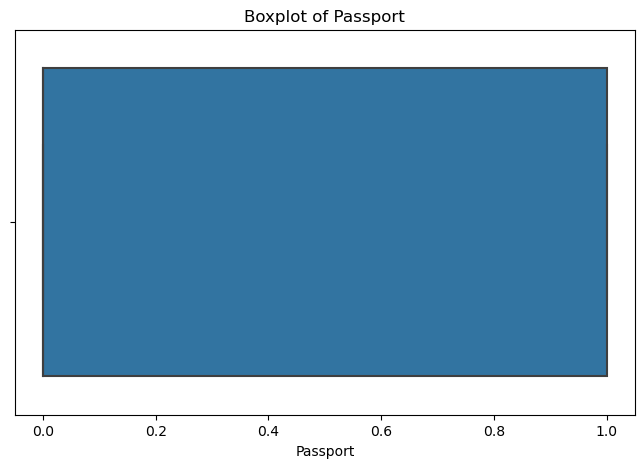

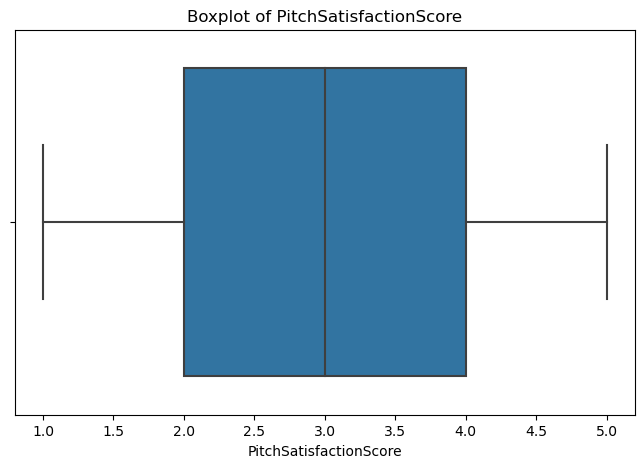

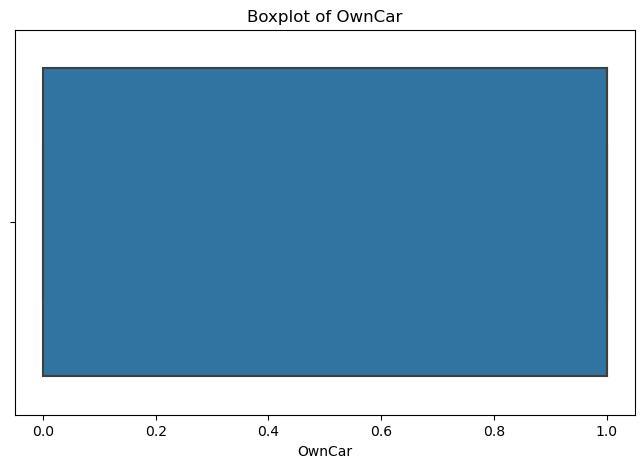

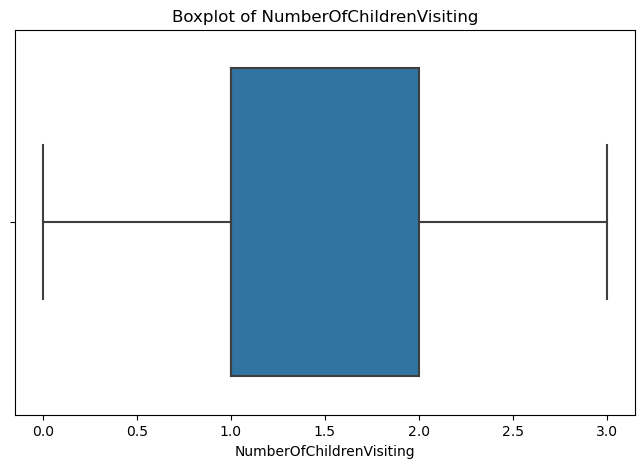

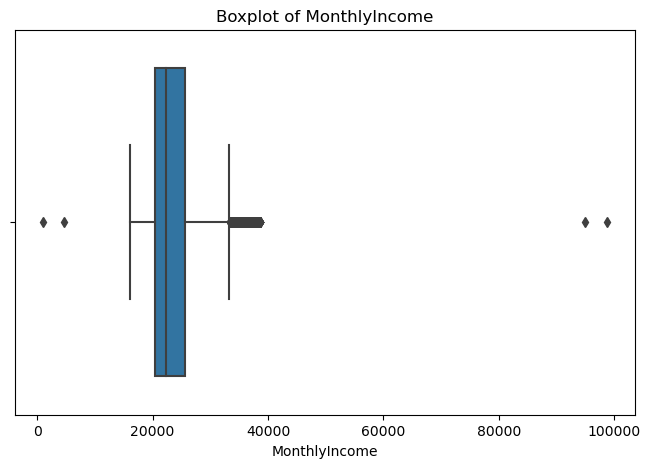

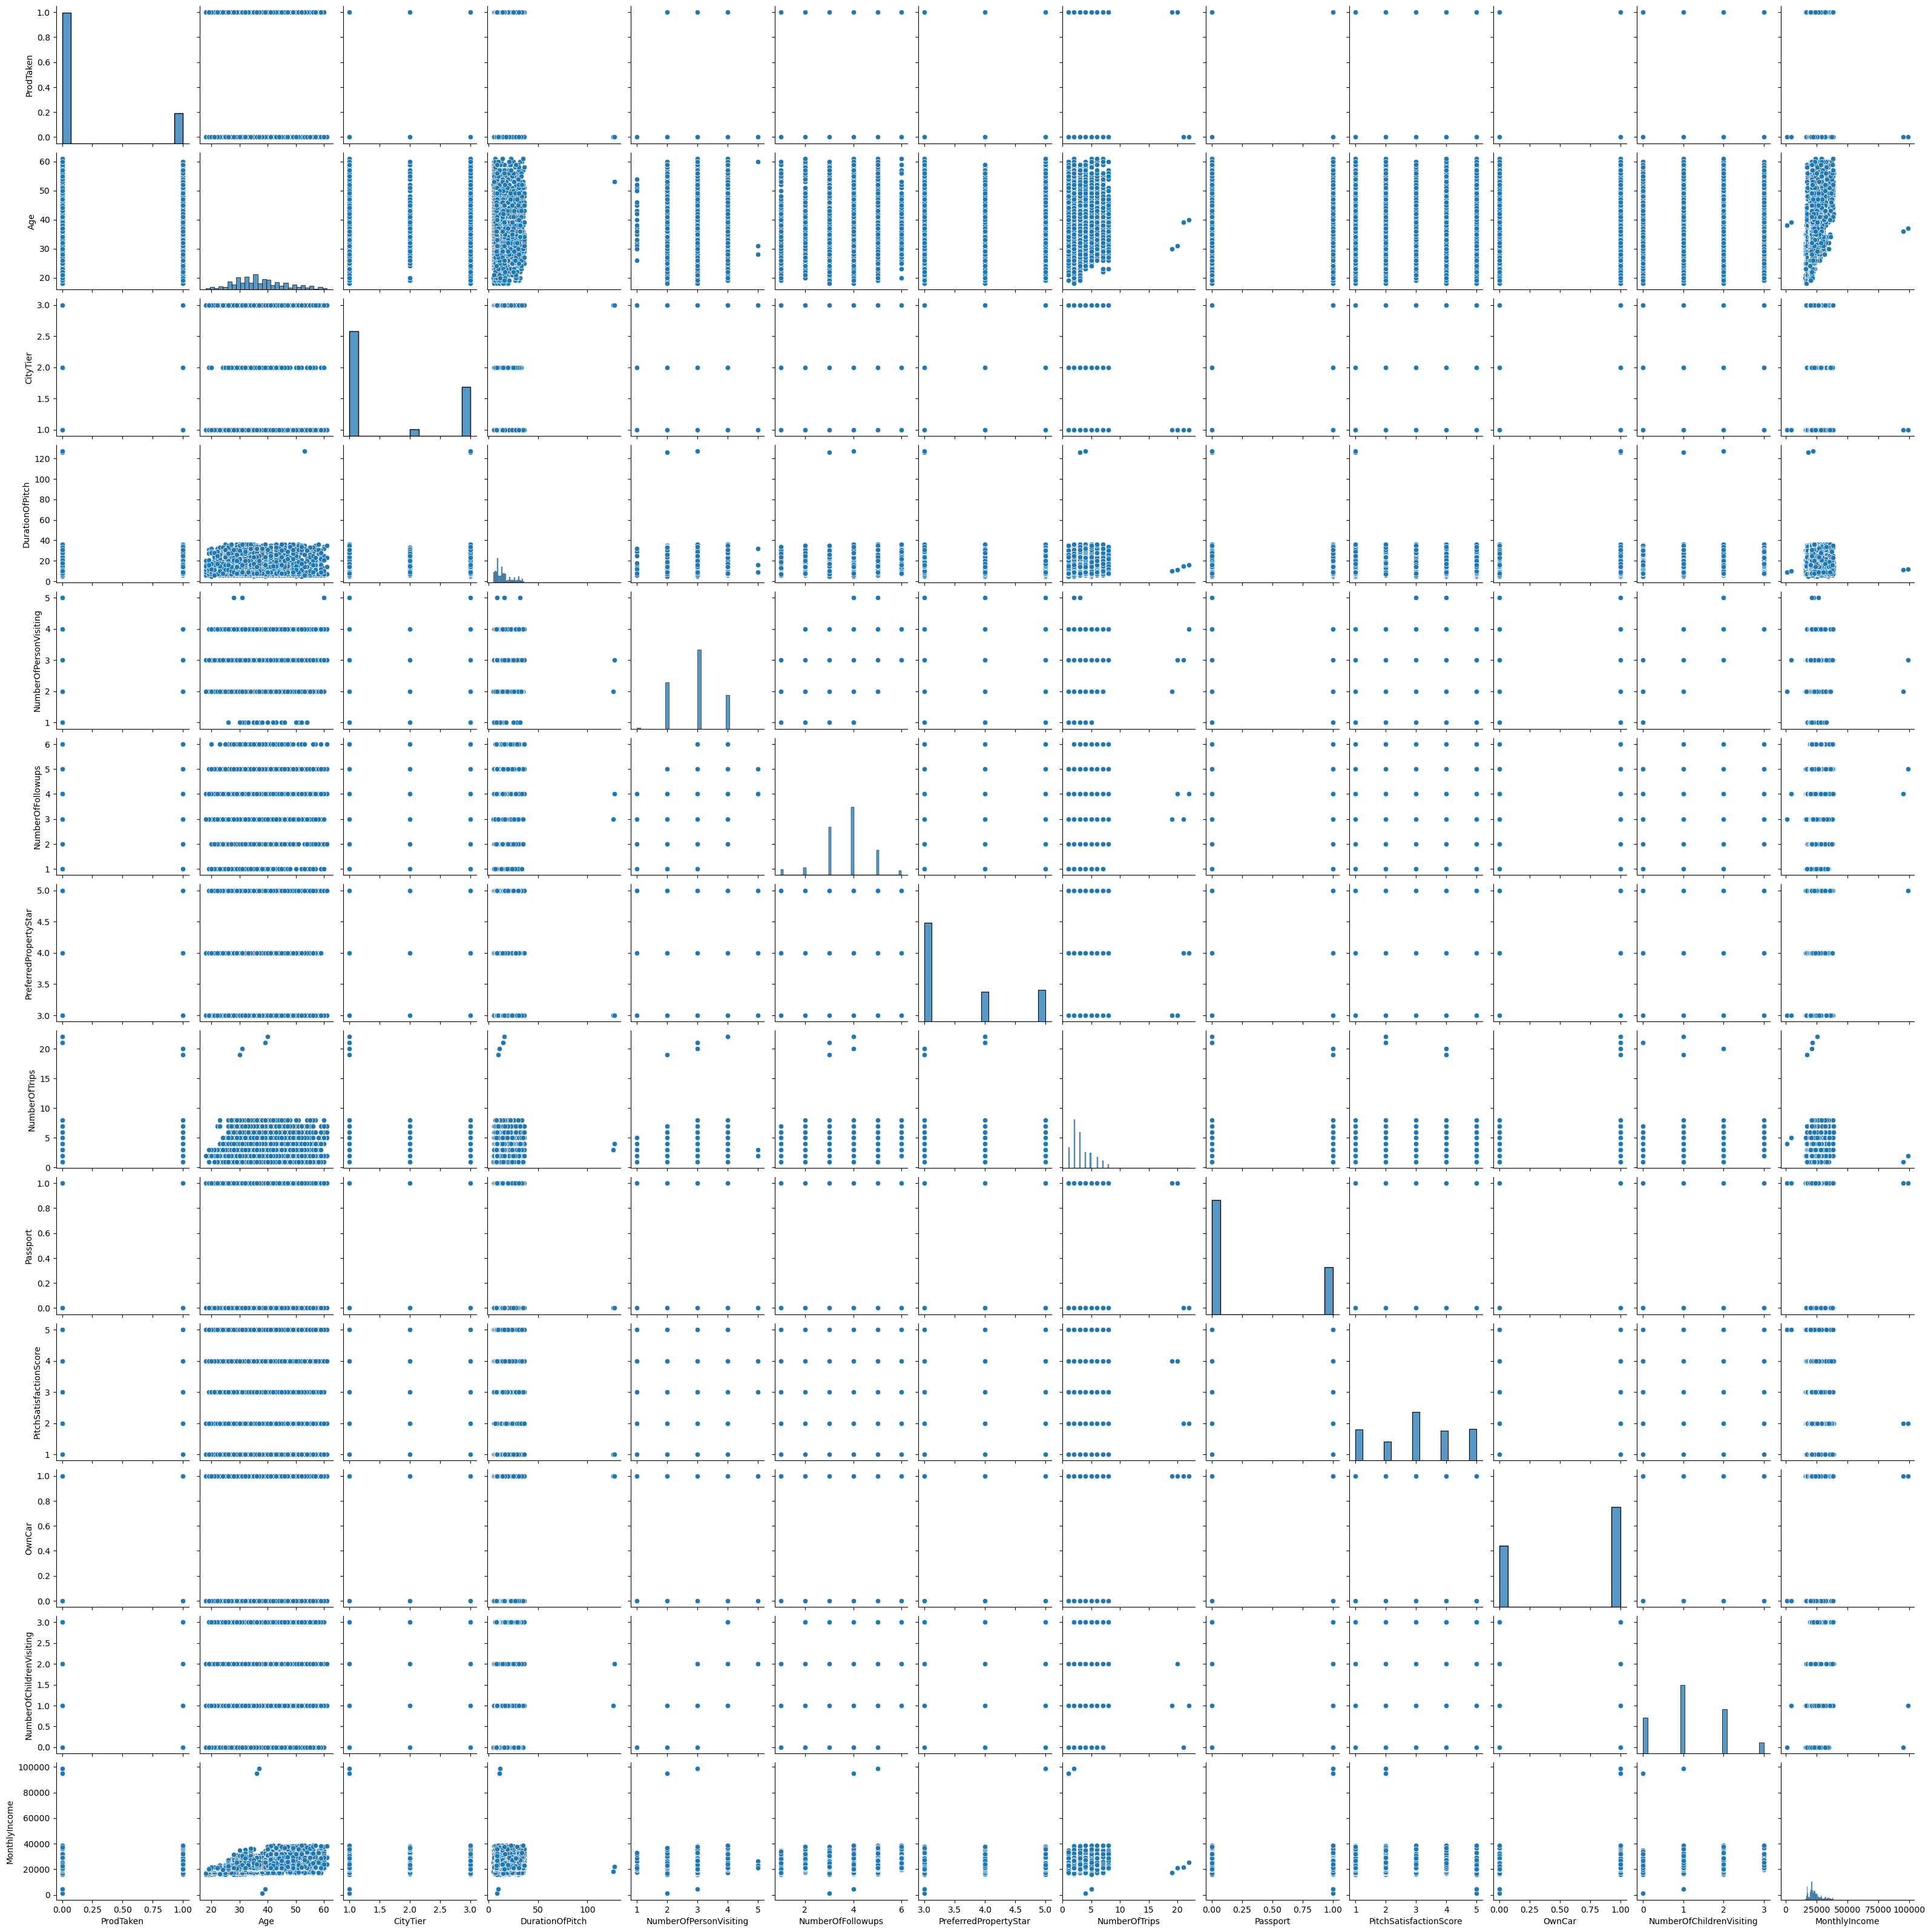


Statistical Characteristics for Basic Package:
       ProdTaken  Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
count        0.0  0.0       0.0              0.0                     0.0   
mean         NaN  NaN       NaN              NaN                     NaN   
std          NaN  NaN       NaN              NaN                     NaN   
min          NaN  NaN       NaN              NaN                     NaN   
25%          NaN  NaN       NaN              NaN                     NaN   
50%          NaN  NaN       NaN              NaN                     NaN   
75%          NaN  NaN       NaN              NaN                     NaN   
max          NaN  NaN       NaN              NaN                     NaN   

       NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
count                0.0                    0.0            0.0       0.0   
mean                 NaN                    NaN            NaN       NaN   
std                  NaN               

C:\Users\moham\AppData\Local\Temp\ipykernel_14288\2249446434.py:98: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


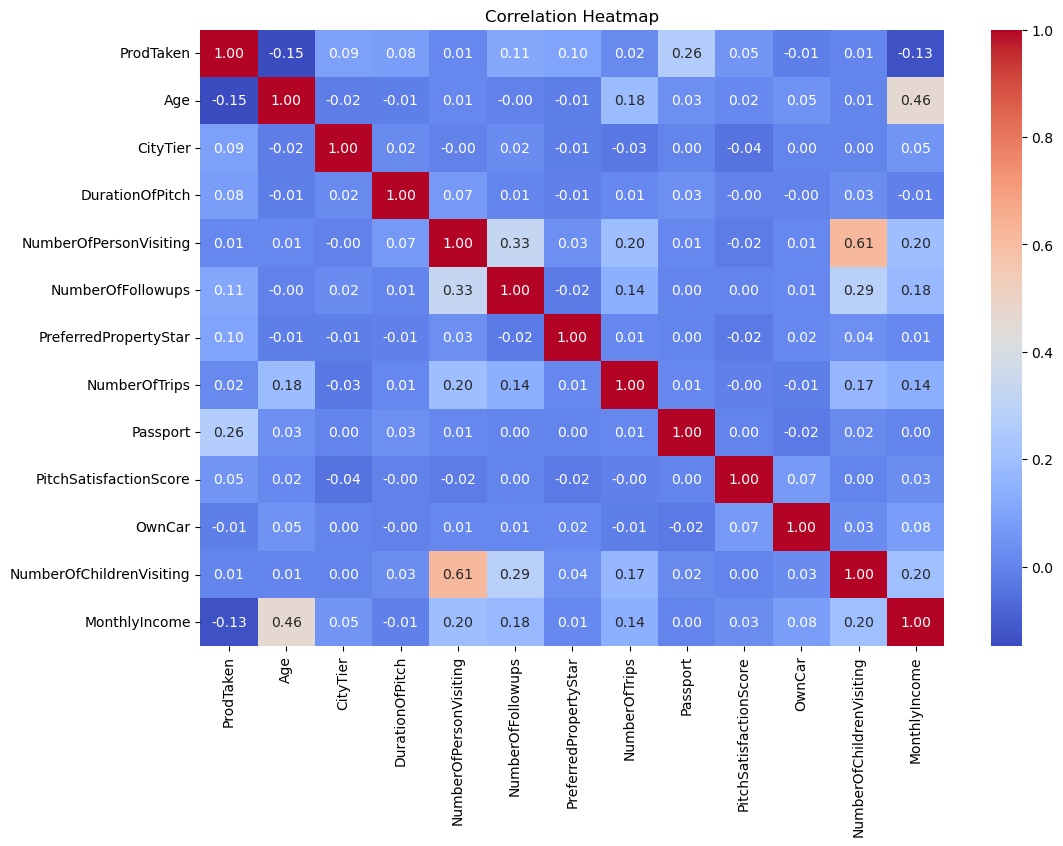

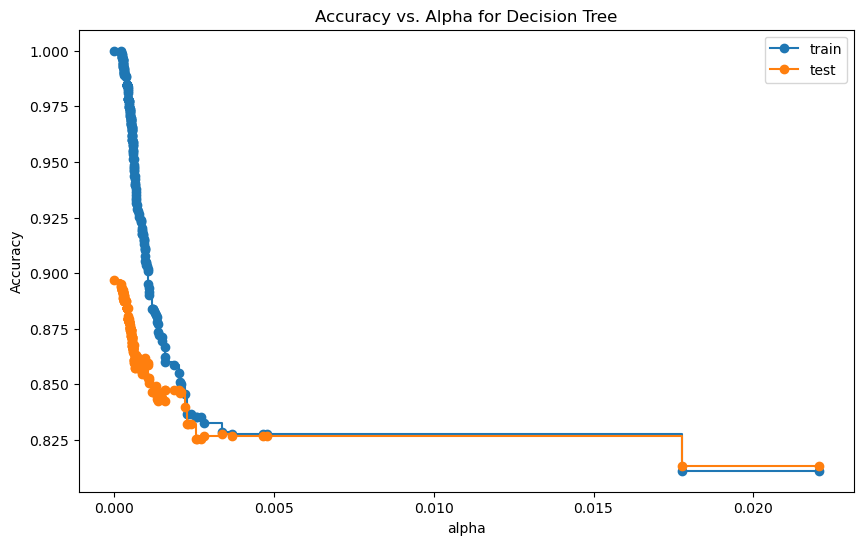


Decision Tree Classifier Performance Metrics:
Train Accuracy: 1.0
Test Accuracy: 0.8970688479890934
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      1193
         1.0       0.72      0.74      0.73       274

    accuracy                           0.90      1467
   macro avg       0.83      0.84      0.83      1467
weighted avg       0.90      0.90      0.90      1467



In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Question 1: Data Understanding & Preparation
# A. Read the 'Tourism.csv' dataset and print the first 5 rows.
data = pd.read_csv('Tourism.csv')

# B. Report the dimension, datatypes and missing values in the dataframe.
print("\nDimensions of the dataframe:", data.shape)
print("\nData types of each column:\n", data.dtypes)
print("\nMissing values in each column:\n", data.isnull().sum())

# C. Print the average of monthly income for each Designation.
avg_monthly_income = data.groupby('Designation')['MonthlyIncome'].mean()
print("\nAverage Monthly Income for each Designation:\n", avg_monthly_income)

# D. Check the percentage of missing values in each column and write your observations.
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)

# E. Check the number of unique values in each column.
print("\nNumber of unique values in each column:\n", data.nunique())

# F. Drop the 'CustomerID'.
data.drop('CustomerID', axis=1, inplace=True)

# G. Print a 5-point summary of the dataframe and share your observation.
print("\n5-point summary of the dataframe:\n", data.describe())

# H. Print the count of each unique category in each of the categorical variables.
categorical_columns = data.select_dtypes(include=['category']).columns
for column in categorical_columns:
    print("\nCount of each unique category in", column, ":\n", data[column].value_counts())

# I. Observe the unexpected values/categories in the categorical variables carefully and impute them with the best approach.
# You may need to check the unique values in each categorical column and handle unexpected values if any.

# J. Convert the data type of each categorical variable to 'category'.
data[categorical_columns] = data[categorical_columns].astype('category')

# Question 2: Data Exploration & Analysis
# A. Create a copy of the prepared data to perform EDA.
eda_data = data.copy()

# B. Perform Univariate Analysis on numerical and Categorical data.
# You may use histograms, box plots, count plots, etc.

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Univariate Analysis for Categorical Columns
categorical_columns = data.select_dtypes(include=['category']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data[column])
    plt.title(f'Count of each category in {column}')
    plt.show()

# C. Examine the outliers and impute them.
# You may use visualization tools like box plots to identify outliers and then decide on the imputation strategy.

# Boxplots for Numerical Columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# D. Perform detailed Bivariate and Multivariate Analysis on the data and share your insights.
# Explore relationships between variables, use scatter plots, pair plots, etc.

# Pairplot for Numerical Columns
sns.pairplot(data[numerical_columns])
plt.show()

# E. Group the data w.r.t to packages/products taken by the customers to build customer profiles.
# Write your observation on their statistical characteristics. [For Basic, Standard, Deluxe, Super Deluxe, and King].
package_types = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']

for package_type in package_types:
    package_data = data[data['ProdTaken'] == package_type]
    print(f"\nStatistical Characteristics for {package_type} Package:")
    print(package_data.describe())


# F. Plot a correlation heatmap on the data and write your observations.
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Question 3: Model building
# A. Split the data into X and Y and Drop the columns of customer interaction data from the dataset.
X = data.drop(['ProdTaken', 'PitchSatisfactionScore', 'ProductPitched', 'NumberOfFollowups', 'DurationOfPitch'], axis=1)
Y = data['ProdTaken']

# B. Impute the missing values with a suitable approach.
# Use SimpleImputer for numerical columns.
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# C. Create dummy variables for string type variables and convert other column types back to float.
data = pd.get_dummies(data, drop_first=True)

# D. Split the dataset into train and test sets with a 70:30 proportion.
X = data.drop(['ProdTaken'], axis=1)
Y = data['ProdTaken']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# E. Model Building
# i. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
dt_predictions_train = dt_model.predict(X_train)
dt_predictions_test = dt_model.predict(X_test)

# ii. Perform Cost Complexity Pruning for different alpha values and visualize its performance for train and test sets.
path = dt_model.cost_complexity_pruning_path(X_train, Y_train)
alphas = path.ccp_alphas

train_accuracy = []
test_accuracy = []

for alpha in alphas:
    dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    dt_pruned.fit(X_train, Y_train)
    train_accuracy.append(dt_pruned.score(X_train, Y_train))
    test_accuracy.append(dt_pruned.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_accuracy, marker='o', label='train', drawstyle="steps-post")
plt.plot(alphas, test_accuracy, marker='o', label='test', drawstyle="steps-post")
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha for Decision Tree')
plt.legend()
plt.show()

# Choose the best model and share the performance metrics (to be performed only for Decision Tree Classifier).
best_alpha = alphas[np.argmax(test_accuracy)]
dt_best_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_best_model.fit(X_train, Y_train)
dt_best_predictions_train = dt_best_model.predict(X_train)
dt_best_predictions_test = dt_best_model.predict(X_test)

print("\nDecision Tree Classifier Performance Metrics:")
print("Train Accuracy:", accuracy_score(Y_train, dt_best_predictions_train))
print("Test Accuracy:", accuracy_score(Y_test, dt_best_predictions_test))
print("Classification Report (Test):\n", classification_report(Y_test, dt_best_predictions_test))

#iii. Tune the Hyper Parameters and fit the model with best parameters
# You may use GridSearchCV for hyperparameter tuning.
# Example:
# param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
# grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
# grid_search.fit(X_train, Y_train)
# best_dt_model = grid_search.best_estimator_

# iv. Print the classification metrics and write your observations on the performance improvement
# You can use classification_report, confusion_matrix, accuracy_score, etc.

# Repeat the above steps (i to iv) for other classifiers: Random Forest, Bagging, AdaBoost, Gradient Boosting.

# F. Build an XGBoost Classifier and print its performance report.
# You may use XGBClassifier from the xgboost library.
# Example:
# from xgboost import XGBClassifier
# xgb_model = XGBClassifier(random_state=42)
# xgb_model.fit(X_train, Y_train)
# xgb_predictions_train = xgb_model.predict(X_train)
# xgb_predictions_test = xgb_model.predict(X_test)
# print("XGBoost Classifier Performance Metrics:")
# print("Train Accuracy:", accuracy_score(Y_train, xgb_predictions_train))
# print("Test Accuracy:", accuracy_score(Y_test, xgb_predictions_test))
# print("Classification Report (Test):\n", classification_report(Y_test, xgb_predictions_test))

# G. Compare the performance of all models for train & test set and provide your insights.
# You can use a DataFrame or a table to compare the performance metrics of different models.
